# Amazon Product Reviews Sentiment Analysis with Python

Dataset : https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews

This dataset contains the product reviews of over 568,000 customers who have purchased products from Amazon.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"F:\Data_Analyst\Projects\Python\Reviews.csv\Reviews.csv")

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.shape

(568454, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

As this dataset is very large, it contains some missing values, so let’s remove all the rows containing the missing values.

In [10]:
df = df.dropna()

In [12]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [13]:
df.shape

(568401, 10)

## Sentiment Analysis of Amazon Product Reviews


The Score column of this dataset contains the ratings that customers have given to the product based on their experience with the product. So let’s take a look at the rating breakdown to see how most customers rate the products they buy from Amazon.

In [14]:
ratings = df["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

In [15]:
ratings

Score
5    363102
4     80654
1     52264
3     42638
2     29743
Name: count, dtype: int64

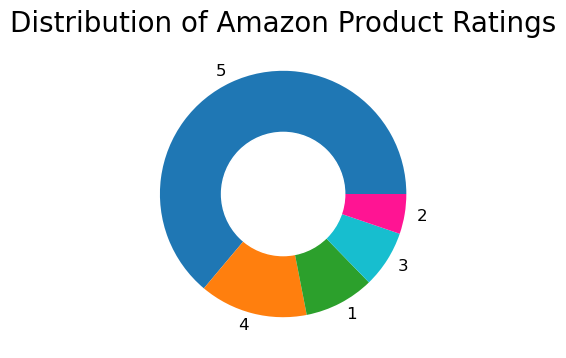

In [25]:
# Plot
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#17becf', 'deeppink']
plt.figure(figsize=(8, 4))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

According to the figure above, more than half of people rated products they bought from Amazon with 5 stars, which is good. 

Now, To perform Sentimental Analysis, we need to add three more columns to this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the customer reviews mentioned in the **Text column of the dataset**.

In [31]:
# To perform Sentimental Analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [32]:
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Text"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Text"]]
df["Neutral"]  = [sentiments.polarity_scores(i)["neu"] for i in df["Text"]]

KeyboardInterrupt: 

In [ ]:
print(df.head())

How most people rated the products they bought from Amazon:

In [29]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive :)")
    elif (b>a) and (b>c):
        print("Negative :| ")
    else:
        print("Neutral :] ")
sentiment_score(x, y, z)

NameError: name 'data' is not defined

So, most people are neutral when submitting their experiences with the products they have purchased from Amazon. Now let’s see the total of all sentiment scores:

In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

So we can say that most of the reviews of the products available on Amazon are positive, as the total sentiment scores of Positive and Neural are much higher than Negative scores.